In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import splev, splrep
from scipy.interpolate import interp1d
from scipy.interpolate import pchip_interpolate

In [2]:
def my_linear_interpolation_looped(x_raw,y_raw,x_fine):
    n_fine = x_fine.shape[0]
    y_interpolated = np.zeros(n_fine)
    for i in range(n_fine):
        bool_stop = True
        j = 0
        while bool_stop:
            j += 1
            bool_stop = x_fine[i]>x_raw[j]
        
        y_interpolated[i] = y_raw[j-1] + (y_raw[j] - y_raw[j-1] ) *\
                          (x_fine[i] - x_raw[j-1]) / (x_raw[j] - x_raw[j-1])
    return y_interpolated

In [3]:
def my_linear_interpolation_vectorized(x_raw,y_raw,x_fine):
    n_raw = x_raw.shape[0]
    n_fine = x_fine.shape[0]
    
    xa = np.zeros(n_fine)
    xb = x_raw[-1]*np.ones(n_fine)

    ya = np.zeros(n_fine)
    yb = y_raw[-1]*np.ones(n_fine)
    
    for i in range(n_raw)[1:-1]:
        inda = np.logical_and(x_fine>=x_raw[i],x_fine<=x_raw[i+1])
        xa[inda] = x_raw[i]
        ya[inda] = y_raw[i]
        
        indb = np.logical_and(x_fine>=x_raw[i-1],x_fine<=x_raw[i])
        xb[indb] = x_raw[i]
        yb[indb] = y_raw[i]
    
    return ya + (yb-ya) * (x_fine-xa) / (xb-xa)

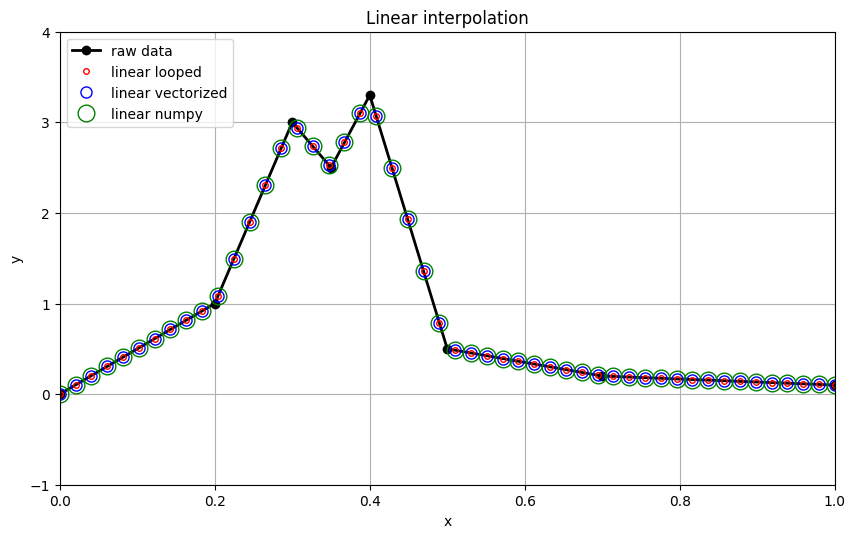

In [4]:
# linear interpolation

x_raw = np.array([ 0, 0.2, 0.3, 0.35, 0.4, 0.5, 0.7, 1])
y_raw = np.array([ 0, 1.0, 3.0, 2.5,  3.3, 0.5, 0.2, 0.1])

n_fine_points = 50
x_fine = np.linspace(np.min(x_raw),np.max(x_raw),n_fine_points)

y_fine_my_linear_looped = my_linear_interpolation_looped(x_raw,y_raw,x_fine)
y_fine_my_linear_vectorized = my_linear_interpolation_vectorized(x_raw,y_raw,x_fine)
y_fine_numpy_linear = np.interp(x_fine, x_raw, y_raw)

fig=plt.figure(figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

ax.plot(x_raw,y_raw,'o-k',lw=2,label='raw data')
ax.plot(x_fine,y_fine_my_linear_looped,linestyle='none',color='r',marker='o',markerfacecolor='none',lw=2,label='linear looped',markersize=4)
ax.plot(x_fine,y_fine_my_linear_vectorized,linestyle='none',color='b',marker='o',markerfacecolor='none',lw=2,label='linear vectorized',markersize=8)
ax.plot(x_fine,y_fine_numpy_linear,linestyle='none',color='g',marker='o',markerfacecolor='none',lw=2,label='linear numpy',markersize=12)

plt.xlim([0,1])
plt.ylim([-1,4])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear interpolation')
plt.legend(loc='upper left')
plt.savefig('linear_interpolation.png',dpi=200,format='png')
plt.show()

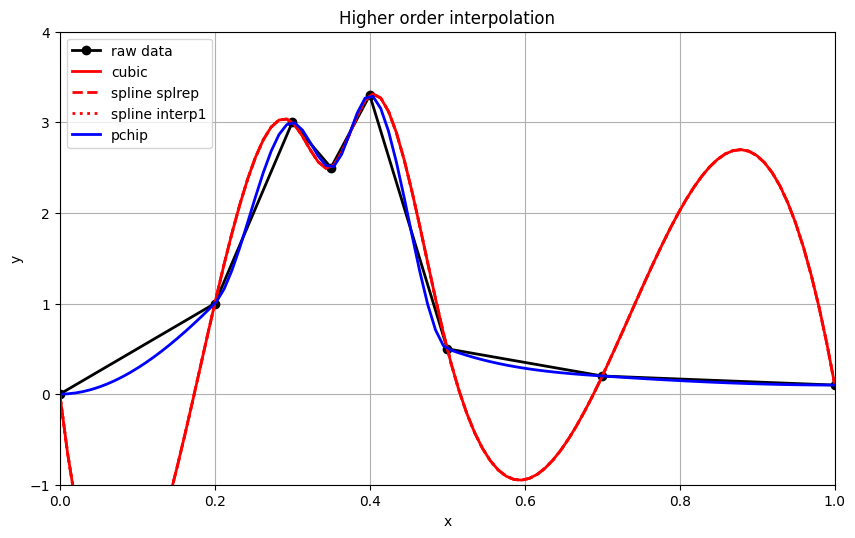

In [5]:
# higher order interpolation

x_raw = np.array([ 0, 0.2, 0.3, 0.35, 0.4, 0.5, 0.7, 1])
y_raw = np.array([ 0, 1.0, 3.0, 2.5,  3.3, 0.5, 0.2, 0.1])

n_fine_points = 100
x_fine = np.linspace(np.min(x_raw),np.max(x_raw),n_fine_points)

cs = CubicSpline(x_raw, y_raw)
y_cubic = cs(x_fine)

spl = splrep(x_raw, y_raw)
y_spline1 = splev(x_fine, spl)

spl = interp1d(x_raw, y_raw, kind='cubic')
y_spline2 = spl(x_fine)

y_pchip = pchip_interpolate(x_raw, y_raw,x_fine)

fig=plt.figure(figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(x_raw,y_raw,'o-k',lw=2,label='raw data')
ax.plot(x_fine,y_cubic,'-r',lw=2,label='cubic')
ax.plot(x_fine,y_spline1,'--r',lw=2,label='spline splrep')
ax.plot(x_fine,y_spline1,':r',lw=2,label='spline interp1')
ax.plot(x_fine,y_pchip,'-b',lw=2,label='pchip')

plt.xlim([0,1])
plt.ylim([-1,4])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Higher order interpolation')
plt.legend(loc='upper left')
plt.savefig('cubic_and_spline_interpolation.png',dpi=200,format='png')
plt.show()